In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.color_palette("rocket", as_cmap=True)

In [ ]:
train = pd.read_csv('house_data/train.csv')
test = pd.read_csv('house_data/test.csv')

In [ ]:
print(train.shape)
print(test.shape)
# Train has one more column the predictor variable SalePrice than the test data
print(set(train.columns)-set(test.columns))

(1460, 81)
(1459, 80)
{'SalePrice'}


In [ ]:
print(train.info())
print('-----------------------'*3)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.drop(['Id'], axis=1).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(train.select_dtypes(exclude=['object']).shape)
print(train.select_dtypes(include=['object']).shape)

(1460, 38)
(1460, 43)


In [ ]:
print(train.head())
print(train.tail())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[5 rows x 81 columns]


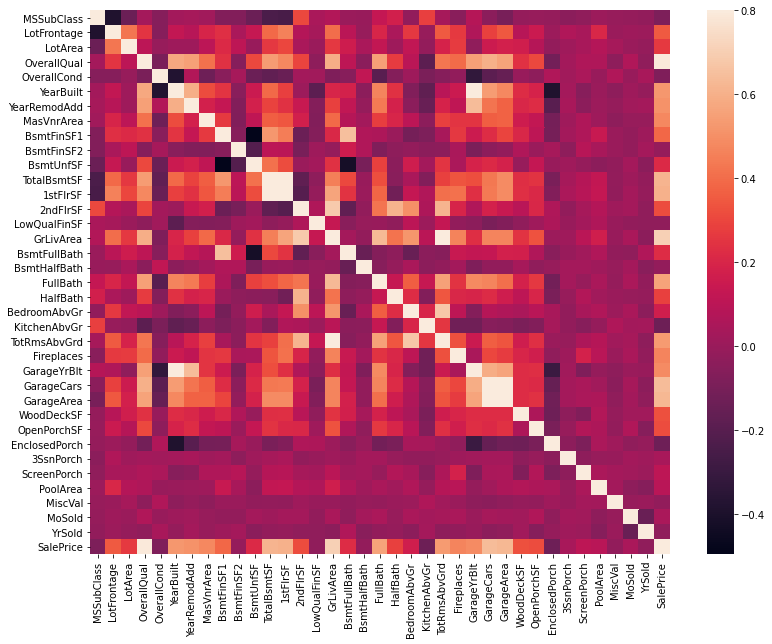

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(train.drop('Id', axis=1).corr(), vmax=0.8)

Removing some variables that are showing high colinearity like:


*   YearBuilt and GarageYrBlt, dropping GarageYrBlt.
*   GrLivArea and TotRmsAbvGrd, dropping TotRmsAbvGrd.
*   1stFlrSF and TotalBsmtSF, dropping TotalBsmtSF

In [ ]:
train.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'], axis=1, inplace=True)
test.drop(['GarageYrBlt','TotRmsAbvGrd','TotalBsmtSF'], axis=1, inplace=True)

In [ ]:
# Top 10 numeric features positively correlated with SalePrice
train.corr()['SalePrice'].sort_values(ascending=False).head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64

In [ ]:
train.corr()['SalePrice'].abs().sort_values(ascending=False).head(11)
top_corr_features=train.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).index
top_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces'],
      dtype='object')

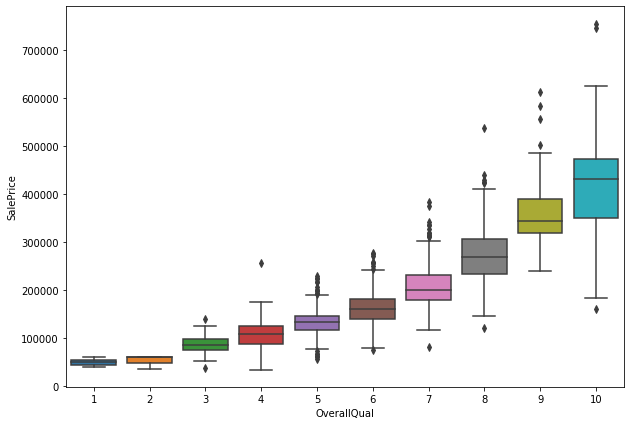

In [ ]:
# Box-plot to check relationship between SalePrice and OverallQual
plt.figure(figsize=(10,7))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)

1298    5642
523     4676
1182    4476
Name: GrLivArea, dtype: int64

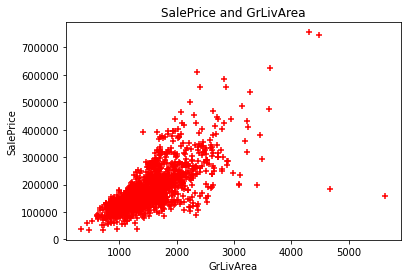

In [ ]:
# Scatterplot to check the relationship between SalePrice and GrLivArea
plt.scatter(x='GrLivArea', y='SalePrice', data=train, color='r', marker='+')
plt.title("SalePrice and GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
train['GrLivArea'].sort_values(ascending=False).head(3)

We have 2 outliers with a GrLivArea but a very low SalePrice. We will drop these two.

In [ ]:
print(train.shape)
train.drop(train.index[[523, 1298]], inplace=True)
print(train.shape)

(1460, 78)
(1458, 78)


In [ ]:
top_corr_features=train.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).index

In [ ]:
print(top_corr_features)
box_feature=['SalePrice','OverallQual','GarageCars','FullBath', 'YearBuilt','YearRemodAdd','Fireplaces']
scatter_feature=['SalePrice', 'GrLivArea','1stFlrSF','GarageArea']
# Use sns.pairplot to check the relationship between the SalePrice and top 10 correlated features
# sns.pairplot(train[scatter_feature])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF',
       'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'Fireplaces'],
      dtype='object')


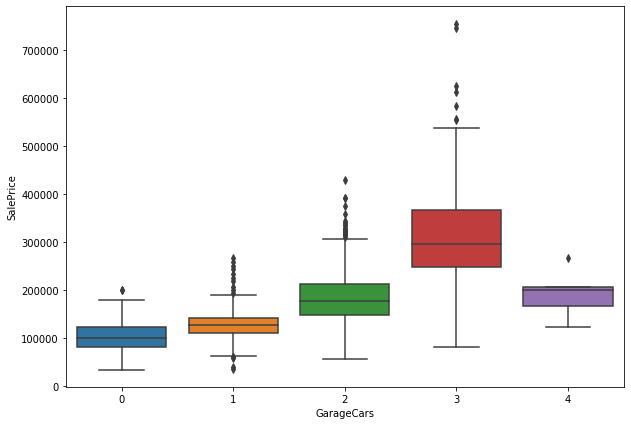

In [ ]:
# Box-plot to check relationship between SalePrice and GarageCars
plt.figure(figsize=(10,7))
sns.boxplot(x='GarageCars', y='SalePrice', data=train)

Plotting all categorical variables against price.

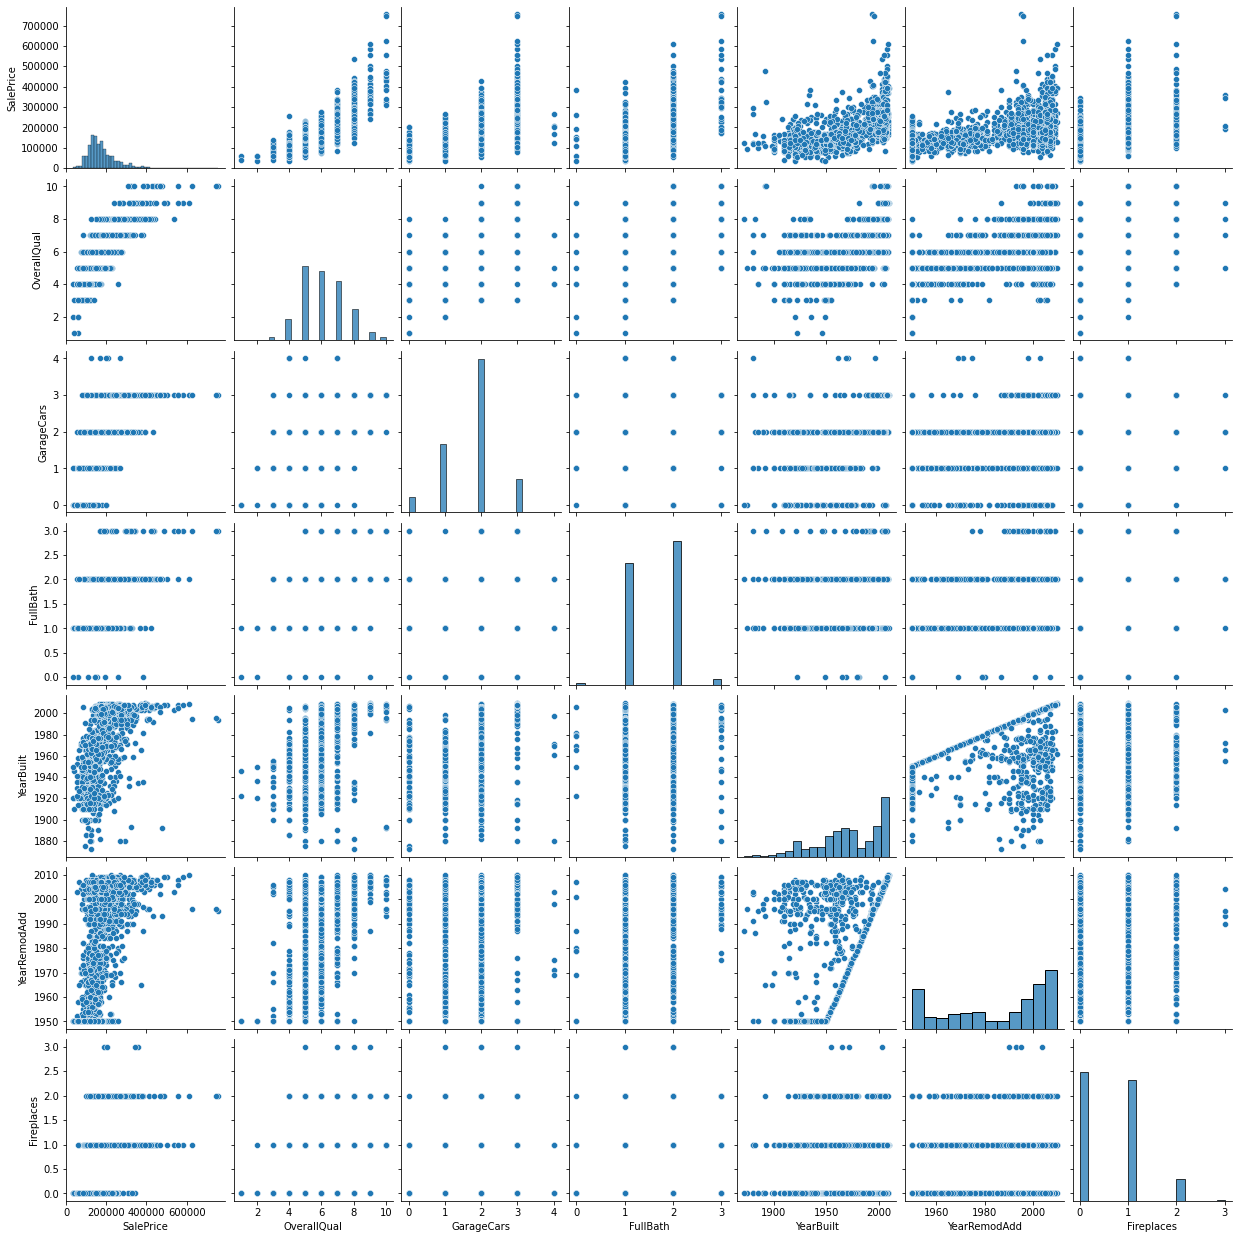

In [ ]:
sns.pairplot(train[box_feature], kind='scatter', diag_kind='hist')

Check for missing values and imputing.

In [ ]:
# Check the NAN values as percentage
train_nan_pct=(train.isnull().sum())/(train.isnull().count())
train_nan_pct=train_nan_pct[train_nan_pct>0]
train_nan_pct.sort_values(ascending=False)

PoolQC          0.995885
MiscFeature     0.962963
Alley           0.937586
Fence           0.807270
FireplaceQu     0.473251
LotFrontage     0.177641
GarageType      0.055556
GarageFinish    0.055556
GarageQual      0.055556
GarageCond      0.055556
BsmtExposure    0.026063
BsmtFinType2    0.026063
BsmtFinType1    0.025377
BsmtCond        0.025377
BsmtQual        0.025377
MasVnrArea      0.005487
MasVnrType      0.005487
Electrical      0.000686
dtype: float64

Features PoolQC, MiscFeature, Alley, Fence and FireplaceQu have a high percentage of null values and aren't correlated to SalePrice highly either, so dropping them from train and test.

Can impute values for other missing features using their respective medians for quantitative measures and mode for qualitative features.

In [ ]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [ ]:
train['GarageQual'].value_counts()

TA    1309
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [ ]:
train_impute_index=train_nan_pct[train_nan_pct<0.2].index
train_impute_mode=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
train_impute_median=['LotFrontage', 'MasVnrArea']

In [ ]:
for feature in train_impute_mode:
    train[feature].fillna(train[feature].mode()[0], inplace=True)
    test[feature].fillna(test[feature].mode()[0], inplace=True)

In [ ]:
for feature in train_impute_median:
    train[feature].fillna(train[feature].median(), inplace=True)
    test[feature].fillna(test[feature].median(), inplace=True)

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(5)

SalePrice       0
BsmtFinSF2      0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
dtype: int64

In [ ]:
test_only_nan=test.isnull().sum().sort_values(ascending=False)
test_only_nan=test_only_nan[test_only_nan>0]
print(test_only_nan.index)
test_impute_mode=['MSZoning', 'BsmtFullBath', 'Utilities','BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual']
test_impute_median=['BsmtFinSF2','GarageArea', 'BsmtFinSF1','BsmtUnfSF' ]

Index(['MSZoning', 'BsmtFullBath', 'Utilities', 'BsmtHalfBath', 'Functional',
       'BsmtFinSF2', 'GarageArea', 'BsmtFinSF1', 'SaleType', 'BsmtUnfSF',
       'Exterior2nd', 'Exterior1st', 'GarageCars', 'KitchenQual'],
      dtype='object')


In [ ]:
for feature in test_impute_median:
  test[feature].fillna(test[feature].median(), inplace=True)

for feature in test_impute_mode:
  test[feature].fillna(test[feature].mode()[0], inplace=True)

In [ ]:
test.isnull().sum().sort_values(ascending=False).head(5)

SaleCondition    0
SaleType         0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
dtype: int64

In [ ]:
test_id = test['Id'] # storing for submission to kaggle for comparisons

Combining train and test.

In [ ]:
all_features = pd.concat((train.drop(['Id','SalePrice'],axis=1), test.drop(['Id'],axis=1)))

Converting categorical data into dummy numeric variables.

In [ ]:
all_features = pd.get_dummies(all_features, drop_first=True)
train_features = all_features[0:train.shape[0]]
test_features = all_features[train.shape[0]:]

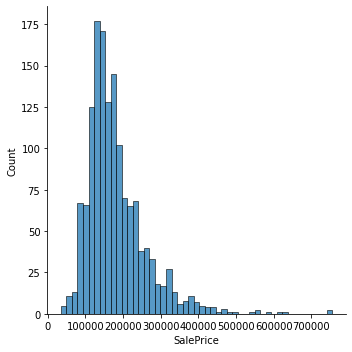

In [ ]:
sns.displot(train['SalePrice'])

Breaking the training data into train and validate sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train[['SalePrice']], test_size=0.3, random_state=100)

Running simple Linear Regression to see how it performs before checking with Ridge and Lasso regression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
simple_regression_model = LinearRegression().fit(X_train, y_train)
simple_linear_preds = simple_regression_model.predict(X_val)
print('Mean squared error for simple linear regression :', np.sqrt(mean_squared_error(simple_linear_preds, y_val)))

Mean squared error for simple linear regression : 26843.133270669718


Seeing how the simple linear model predictions on the validation set look like.

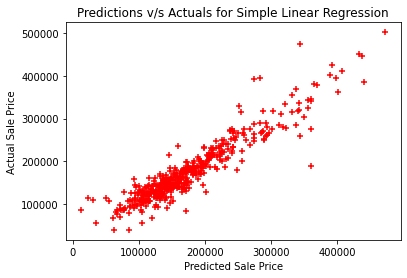

In [ ]:
plt.scatter(simple_linear_preds, y_val,color='r', marker='+')
plt.title("Predictions v/s Actuals for Simple Linear Regression")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.show()

We see that there is a generally straight line so Simple Linear Regression is performing okay, but there is certainly room for improvement.

Let's see if Ridge regression can do any better.

In [ ]:
from sklearn.linear_model import Ridge
rmse=[]
# check the below alpha values for Ridge Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

[26697.303926084576, 26469.238139767083, 25942.271845124385, 25156.31461212365, 24157.914513467193, 23427.01319621232, 23082.349441256843, 23281.100332044338]


Text(0, 0.5, 'Root Mean Squared Error')

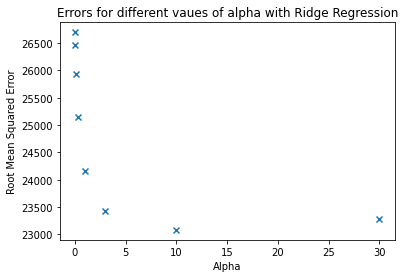

In [ ]:
for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse, marker='x')
plt.title("Errors for different vaues of alpha with Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

We see that a value of 10 for alpha gives us the least error. Using that as a guide to further improve our prediction for the value of alpha :

[23102.181773889137, 23094.728753036685, 23089.111881339148, 23085.05994041613, 23082.349441256843, 23080.794653097797, 23080.240043515845, 23080.554470542233, 23081.62666741749, 23083.361694306834, 23085.67812246637, 23088.50577959258]


Text(0, 0.5, 'Root Mean Squared Error')

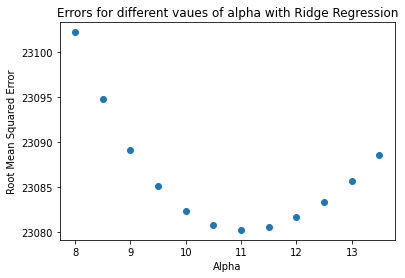

In [ ]:
alpha=np.arange(8,14, 0.5)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
plt.title("Errors for different vaues of alpha with Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

In [ ]:
rmse=pd.Series(rmse, index=alpha)
print(alpha[rmse.argmin()])

11.0


And going a bit further..

[23080.794653097797, 23080.608232740764, 23080.460624409472, 23080.350747625584, 23080.277557541554, 23080.24004351583, 23080.237227756228, 23080.268164027228, 23080.331936417926, 23080.427658167046, 23080.55447054224]


Text(0, 0.5, 'Root Mean Squared Error')

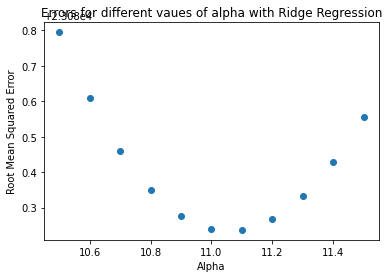

In [ ]:
alpha=np.arange(10.5, 11.6, 0.1)
rmse=[]

for alph in alpha:
    ridge=Ridge(alpha=alph, copy_X=True, fit_intercept=True)
    ridge.fit(X_train, y_train)
    predict=ridge.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)
plt.title("Errors for different vaues of alpha with Ridge Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

In [ ]:
rmse=pd.Series(rmse, index=alpha)
print(alpha[rmse.argmin()])

11.099999999999998


So we can take 11.1 as our best guess for the value of alpha for this Ridge Regression.

In [ ]:
ridge=Ridge(alpha=11.1)
ridge.fit(X_train, y_train)
ridge_preds=ridge.predict(X_val)
print('RMSE with Ridge Regression :', np.sqrt(mean_squared_error(predict, y_val)))

RMSE with Ridge Regression : 23080.55447054224


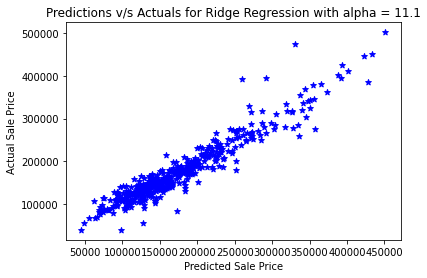

In [ ]:
plt.scatter(ridge_preds, y_val,color='b', marker='*')
plt.title("Predictions v/s Actuals for Ridge Regression with alpha = 11.1")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.show()

Testing Ridge Regression on the test data.

In [ ]:
ridge=Ridge(alpha=11.1)
# Use all training data to fit the model
ridge.fit(train_features, train[['SalePrice']])
ridge_test_preds=ridge.predict(test_features)

Ridge certainly performed better than Simple Linear Regression. Let's see how Lasso does.

In [ ]:
from sklearn.linear_model import Lasso
rmse=[]
# check the below alpha values for Lasso Regression
alpha=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190915202738.53006, tolerance: 683165308.7914835
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190941321273.11407, tolerance: 683165308.7914835
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191023787489.60065, tolerance: 683165308.7914835
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191258525

[26788.64594432559, 26786.375229596706, 26762.034689389908, 26695.192873917, 26442.893057318728, 26008.645849128356, 24926.85119263549, 23382.494638820845]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191961272148.4586, tolerance: 683165308.7914835
  positive)


Text(0, 0.5, 'Root Mean Squared Error')

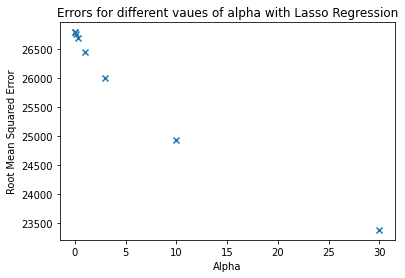

In [ ]:
for alph in alpha:
    lasso=Lasso(alpha=alph)
    lasso.fit(X_train, y_train)
    predict=lasso.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse, marker='x')
plt.title("Errors for different vaues of alpha with Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

[23382.494638820845, 23037.913823049592, 22963.6470203886, 22972.2776821411, 22998.759046958134]


Text(0, 0.5, 'Root Mean Squared Error')

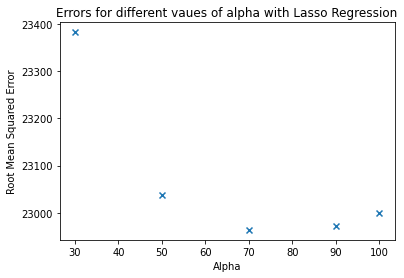

In [ ]:
rmse=[]
alpha=[30, 50, 70, 90, 100]
for alph in alpha:
    lasso=Lasso(alpha=alph)
    lasso.fit(X_train, y_train)
    predict=lasso.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse, marker='x')
plt.title("Errors for different vaues of alpha with Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

[22962.5163990626, 22961.834632430717, 22961.229071452613, 22960.665035005353, 22960.142773186933, 22959.79241632444, 22959.484939332368, 22959.24486358312, 22959.32112973809, 22959.507450838664, 22959.837981203702, 22960.24968109116]


Text(0, 0.5, 'Root Mean Squared Error')

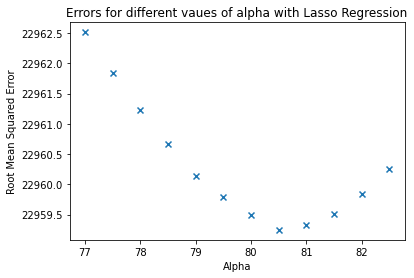

In [ ]:
alpha=np.arange(77, 83, 0.5)
rmse=[]
for alph in alpha:
    lasso=Lasso(alpha=alph)
    lasso.fit(X_train, y_train)
    predict=lasso.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse, marker='x')
plt.title("Errors for different vaues of alpha with Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

In [ ]:
rmse=pd.Series(rmse, index=alpha)
print(alpha[rmse.argmin()])

80.5


[22959.484939332368, 22959.430898739614, 22959.376599988653, 22959.32407639897, 22959.280795554245, 22959.24486358312, 22959.21217541735, 22959.23292976215, 22959.26043074568, 22959.289809746988]


Text(0, 0.5, 'Root Mean Squared Error')

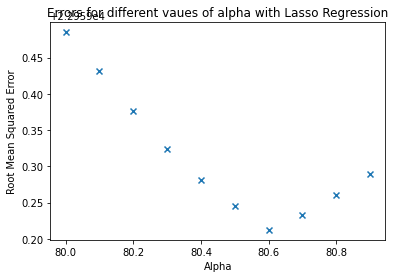

In [ ]:
alpha=np.arange(80, 81, 0.1)
rmse=[]
for alph in alpha:
    lasso=Lasso(alpha=alph)
    lasso.fit(X_train, y_train)
    predict=lasso.predict(X_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse, marker='x')
plt.title("Errors for different vaues of alpha with Lasso Regression")
plt.xlabel("Alpha")
plt.ylabel("Root Mean Squared Error")

In [ ]:
rmse=pd.Series(rmse, index=alpha)
print(alpha[rmse.argmin()])

80.59999999999997


We can take value of alpha for Lasso Regression to be 80.6 in this case.

In [ ]:
lasso=Lasso(alpha=80.6)
lasso.fit(X_train, y_train)
lasso_preds=lasso.predict(X_val)
print('RMSE with Lasso Regression :', np.sqrt(mean_squared_error(lasso_preds, y_val)))

RMSE with Lasso Regression : 22959.212175417324


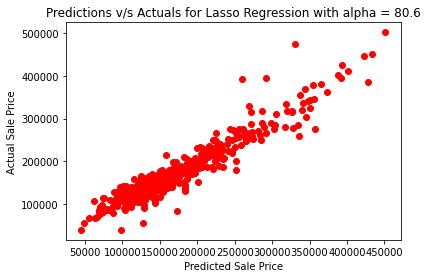

In [ ]:
plt.scatter(ridge_preds, y_val,color='r', marker='o')
plt.title("Predictions v/s Actuals for Lasso Regression with alpha = 80.6")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.show()

In [ ]:
lasso=Lasso(alpha=80.6)
# Use all training data to fit the model
lasso.fit(train_features, train[['SalePrice']])
lasso_test_preds=ridge.predict(test_features)